In [1]:
import sys
import os
sys.path.append(os.getcwd() + "/../")

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from src.models.well_relevant import ClusterWrapper

sns.set_style("whitegrid")

In [3]:
# Load the Iris dataset
df = pd.read_csv("../data/cleaned/data.csv", index_col=0)

# Split the data into training and test sets with stratification
X_train, X_test = train_test_split(df, test_size=0.2)

# Apply Min-Max normalization to the feature data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [4]:
# Initialize the ClusterWrapper class with KMeans and a range of K values
cluster_wrapper = ClusterWrapper(cluster_model=KMeans, K_range=range(2,10))

# Fit the class to the training data
cluster_wrapper.fit(X_train)

In [5]:
X_test[:5]

,Обводненность_для_расчета_PVT_параметров,Глубина_по_стволу_cs,Внутренний_диаметр_эксплуатационной_колонны_cs,Внутренняя_шероховатость_эксплуатационной_колонны_cs,Глубина_по_стволу,Внутренний_диаметр_НКТ,Внутренняя_шероховатость_НКТ,Внешний_диаметр_НКТ,Внутренний_диаметр_эксплуатационной_колонны,FILTERED_MD_LAST_VALUE,...,Коэффициент_продуктиности,Глубина_спуска_ЭЦН_по_стволу_MD,Частота_ЭЦН,Количество_ступеней,Коэффициент_износа,Содержание_растворенного_газа,Плотность_нефти,Удельный_вес_газа,Корреляция_вязкости_нефти,Пластовое_давление
7,93.150002,3558.20,0.1596,0.000152,3092.00,0.062,0.000152,0.073,0.1596,4003.00,...,3.288748,3092.000142,49.599998,372,0.11,255.132006,858.935001,0.66160,2,109.862353
114,91.599998,3283.96,0.1596,0.000015,3114.00,0.062,0.000015,0.073,0.1596,3284.00,...,1.046644,3113.999916,55.299999,400,0.15,130.000005,869.000005,0.79833,1,114.765466
0,1.200000,3026.00,0.1130,0.000152,2851.75,0.062,0.000152,0.073,0.1598,3026.00,...,5.967998,2851.749877,60.000000,354,0.90,143.899995,867.399978,0.87940,1,300.103133
54,95.050003,3511.00,0.1596,0.000152,3210.51,0.063,0.000152,0.074,0.1596,3511.00,...,0.735881,3210.509895,52.000000,389,0.08,255.132006,858.935001,0.66160,2,133.397293
166,3.600000,3490.00,0.1560,0.000015,3000.12,0.062,0.000015,0.073,0.1560,3923.35,...,0.217027,3000.119909,58.000000,401,0.50,285.943002,833.946000,0.99313,0,159.874111


In [6]:
n = 5
input_ = X_test[:1]
# Predict the cluster assignments for the i-th test data point
sorted_indices, _ = cluster_wrapper.predict(input_)

# Check if the true label is among the top n predicted labels
top_n_labels = sorted_indices[:n]
top_n_labels


array([136,  13,  33,  52, 143])

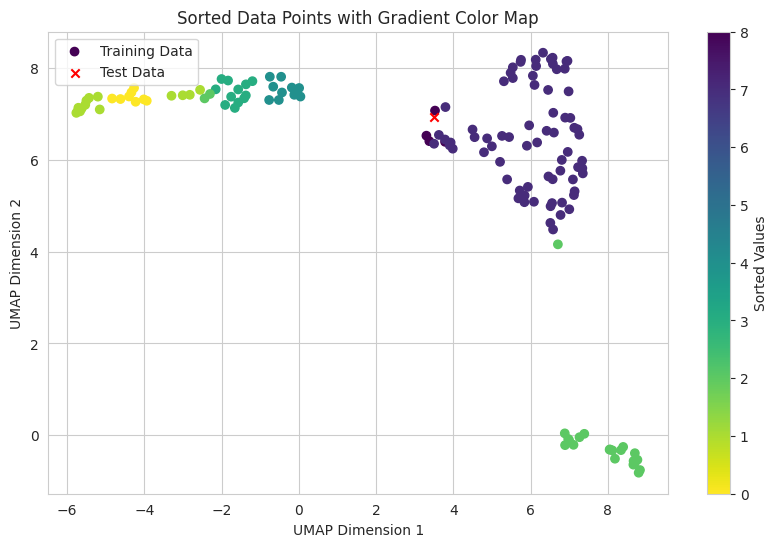

(array([136,  13,  33,  52, 143,  69,  58,  60,  61,  63,  64,  65,  66,
         67,  68, 142,  70,  72,  73,  75,  79,  81,  82,  83,  86,  87,
         57,  45,  46,  19,   1,   3,   8,  10,  11,  12,  15,  16,  18,
         20,  91,  21,  22,  24,  30,  39,  40,  41,  42,  44,  89,   0,
        118, 114, 112, 117, 111, 110, 109, 119, 107, 106, 105, 120, 122,
        102, 123, 124, 126, 127, 128, 129,  97,  96, 135, 141, 125,  35,
        131, 134, 139,   5, 140,  47,  92,  74,  80,  29,  34,  77,  85,
         27,  50,   4,  53,  54,  88,  56, 104,  25,  78,  99, 132, 130,
         17,  32, 137, 138,  95,   7, 115,  59,  71, 101,  48, 113, 116,
        121, 103,  43,  38,  55,  23,  37,  51,   2,  94,  90,  76,  14,
         84,  62,  28,  93,   9,   6,  31,  49, 108,  98,  26,  36, 100,
        133]),
 array([8., 8., 8., 8., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7.

In [13]:
def plot_well_sim(x, X_train):
    X_train = np.array(X_train)
    
    # Transform data using UMAP
    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(np.concatenate([X_train, x], axis=0))
    
    # Extract sorted data points and sorted values
    sorted_indices, sorted_values = cluster_wrapper.predict(x)
    
    # Plot the sorted data points with a gradient color map
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        embedding[:-1, 0][sorted_indices], 
        embedding[:-1, 1][sorted_indices], 
        c=sorted_values, 
        cmap='viridis_r', 
        label='Training Data'
    )
    plt.colorbar(scatter, label='Sorted Values', ticks=np.arange(min(sorted_values), max(sorted_values)+1, 1))

    # Plot the test data point
    plt.scatter(embedding[-1, 0], embedding[-1, 1], c='red', marker='x', label='Test Data')

    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.title('Sorted Data Points with Gradient Color Map')
    plt.legend()
    plt.grid(True)
    plt.show()

    return sorted_indices, sorted_values #  SOLIDа не будет

# Plot the similar wells
plot_well_sim(X_test[:1], X_train)


In [12]:
X_test[:1]

,Обводненность_для_расчета_PVT_параметров,Глубина_по_стволу_cs,Внутренний_диаметр_эксплуатационной_колонны_cs,Внутренняя_шероховатость_эксплуатационной_колонны_cs,Глубина_по_стволу,Внутренний_диаметр_НКТ,Внутренняя_шероховатость_НКТ,Внешний_диаметр_НКТ,Внутренний_диаметр_эксплуатационной_колонны,FILTERED_MD_LAST_VALUE,...,Коэффициент_продуктиности,Глубина_спуска_ЭЦН_по_стволу_MD,Частота_ЭЦН,Количество_ступеней,Коэффициент_износа,Содержание_растворенного_газа,Плотность_нефти,Удельный_вес_газа,Корреляция_вязкости_нефти,Пластовое_давление
7,93.150002,3558.2,0.1596,0.000152,3092.0,0.062,0.000152,0.073,0.1596,4003.0,...,3.288748,3092.000142,49.599998,372,0.11,255.132006,858.935001,0.6616,2,109.862353
